In [12]:
__depends__=["../results/tau20.electron.sol.txt","../results/tau20.ion.sol.txt","../results/tau20.single.sol.txt",
             "../results/tau500.electron.sol.txt","../results/tau500.ion.sol.txt","../results/tau500.single.sol.txt"]
__dest__=["../results/f6.eps","../results/f7.eps"]

# Plot Non-equilibrium Ionization Results
Compare the NEI results to the ionization equilibrium results for two pulse durations, $\tau=20$ s and $\tau=500$ s using both the temperature and density profiles as well as the emission measure distributions, $\mathrm{EM}(T)$.

In [24]:
import os
import sys
import pickle

import numpy as np
import seaborn.apionly as sns
import matplotlib.pyplot as plt
from matplotlib import ticker

sys.path.append(os.path.join(os.environ['EXP_DIR'],'EBTEL_analysis/src'))
import em_binner as emb
%matplotlib inline

In [26]:
plt.rcParams.update({'figure.figsize' : [16,5]})

Set some colors and linestyles.

In [15]:
colors = {'20':sns.color_palette('deep')[0],'500':sns.color_palette('deep')[3]}
linestyles = {'single':'solid','electron':'dashed','ion':'-.'}

Hardcode the loop length. In this paper, we only use a single loop half-length of $L=40$ Mm.

In [22]:
loop_length = 40.e+8

First, we'll load in the NEI results.

In [16]:
nei_results = {'single':{},'electron':{},'ion':{}}

In [17]:
file_template = "../results/tau%d.%s.sol.txt"
species = ['single','electron','ion']
tau = [20,500]
for s in species:
    for t in tau:
        _tmp_ = np.loadtxt(file_template%(t,s))
        nei_results[s]['tau%d'%t] = {'t':_tmp_[:,0],'T':_tmp_[:,1],'Teff':_tmp_[:,2],'n':_tmp_[:,3]}

Now, build the temperature profiles.

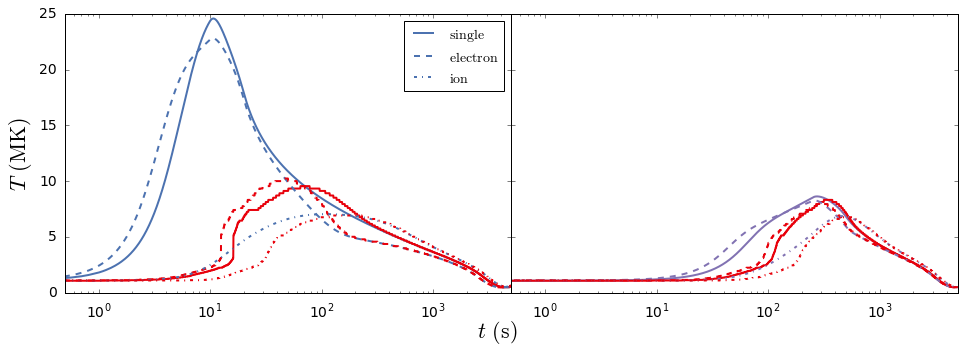

In [21]:
fig,ax = plt.subplots(1,2,sharey=True)
plt.subplots_adjust(hspace=0.0,wspace=0.0)
for t in tau:
    for s in species:
        ax[tau.index(t)].plot(nei_results[s]['tau%d'%t]['t'],nei_results[s]['tau%d'%t]['T']/1.e+6,
                             color=colors[str(t)],linestyle=linestyles[s],label=r'$\mathrm{%s}$'%s)
        ax[tau.index(t)].plot(nei_results[s]['tau%d'%t]['t'],nei_results[s]['tau%d'%t]['Teff']/1.e+6,
                             color=sns.color_palette('bright')[2],linestyle=linestyles[s])
#scale
ax[0].set_xscale('log')
ax[1].set_xscale('log')
#limits
ax[0].set_xlim([0.5,5000])
ax[1].set_xlim([0.5,5000])
ax[0].set_ylim([0,25])
ax[1].set_ylim([0,25])
#tick labels
ax[0].yaxis.set_major_locator(ticker.MaxNLocator(nbins=6,prune='lower'))
ax[1].yaxis.set_major_locator(ticker.MaxNLocator(nbins=6))
#axes labels
ax[0].set_ylabel(r'$T$ $\mathrm{(MK)}$')
global_xlab = fig.text(0.5, 0.015, r'$t$ $\mathrm{(s)}$', ha='center', va='center',fontsize=22)
#legend
ax[0].legend(loc='best')
plt.savefig(__dest__[0],bbox_extra_artists=[global_xlab], bbox_inches='tight')
plt.show()

Now, plot the emission measure distributions with their NEI counterparts.

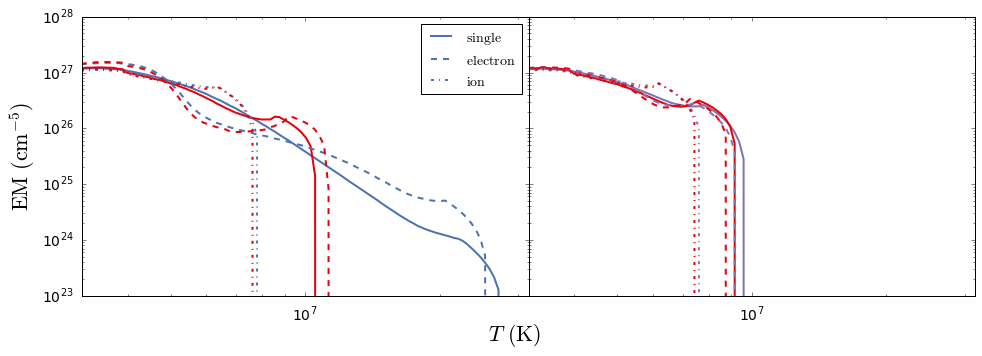

In [27]:
fig,ax = plt.subplots(1,2,sharey=True)
plt.subplots_adjust(wspace=0.0)
for t in tau:
    for s in species:
        #IEQ
        binner = emb.EM_Binner(2.*loop_length,time=nei_results[s]['tau%d'%t]['t'],
                               temp=nei_results[s]['tau%d'%t]['T'],density=nei_results[s]['tau%d'%t]['n'])
        binner.build_em_dist()
        hist,bin_edges = np.histogram(binner.T_em_flat,bins=binner.T_em_histo_bins,weights=np.array(binner.em_flat))
        ax[tau.index(t)].plot((bin_edges[:-1]+bin_edges[1:])/2,hist/10,
                             color=colors[str(t)],linestyle=linestyles[s],label=r'$\mathrm{%s}$'%s)
        #NEI
        binner = emb.EM_Binner(2.*loop_length,time=nei_results[s]['tau%d'%t]['t'],
                               temp=nei_results[s]['tau%d'%t]['Teff'],density=nei_results[s]['tau%d'%t]['n'])
        binner.build_em_dist()
        hist,bin_edges = np.histogram(binner.T_em_flat,bins=binner.T_em_histo_bins,weights=np.array(binner.em_flat))
        ax[tau.index(t)].plot((bin_edges[:-1]+bin_edges[1:])/2,hist/10,
                             color=sns.color_palette('bright')[2],linestyle=linestyles[s])
#scale
ax[0].set_yscale('log')
ax[1].set_yscale('log')
ax[0].set_xscale('log')
ax[1].set_xscale('log')
#limits
ax[0].set_xlim([10**6.5,10**7.5])
ax[0].set_ylim([1e+23,1e+28])
ax[1].set_xlim([10**6.5,10**7.5])
ax[1].set_ylim([1e+23,1e+28])
#labels
global_xlab = fig.text(0.5, 0.015, r'${T}\,\,\mathrm{(K)}$', ha='center', va='center',fontsize=22)
ax[0].set_ylabel(r'$\mathrm{EM}\,\,(\mathrm{cm}^{-5})$')
#legend
ax[0].legend(loc='best')
#save
plt.savefig(__dest__[1],bbox_extra_artists=[global_xlab], bbox_inches='tight')
plt.show()